In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("The_Cancer_data_1500_V2.csv")

print(df.dtypes, '\n')
print(df.shape, '\n')

df.describe().T

print('\n', df.head(), '\n')

X = df.iloc[:, :8]  # Features (first 8 columns)
y = df.iloc[:, 8]   # Target (9th column)

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape, '\n')

def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

outliers_dict = {}
for feature in X:  
    if(feature == 'Age' or feature == 'BMI' or feature == 'PhysicalActivity' or feature == 'AlcoholIntake'):
        outliers = find_outliers(X[feature])
        outliers_dict[feature] = X[feature][outliers]
    
for feature, outliers in outliers_dict.items():
    print(f"Feature '{feature}' has {len(outliers)} outliers.")



Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object 

(1500, 9) 


    Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1   


Features shape: (1500, 8)
Targ

In [4]:
# Training Under Linear Regression

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
r_sq = r2_score(y_test, y_hat)

print("MSE", mse)
print("R^2", r_sq)

MSE 0.11550648545777721
R^2 0.5129505392053996


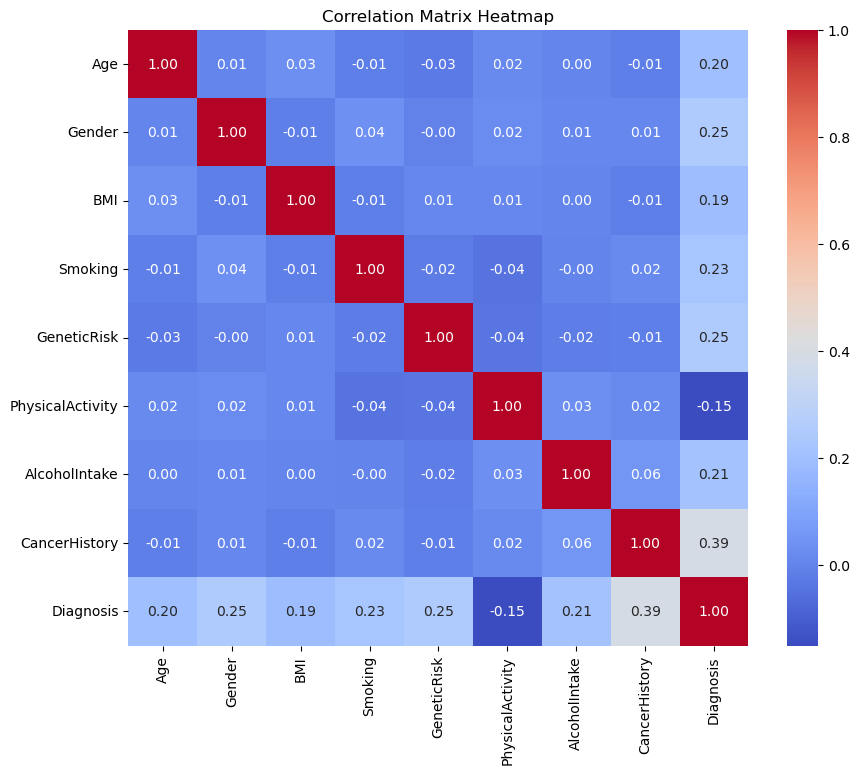

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

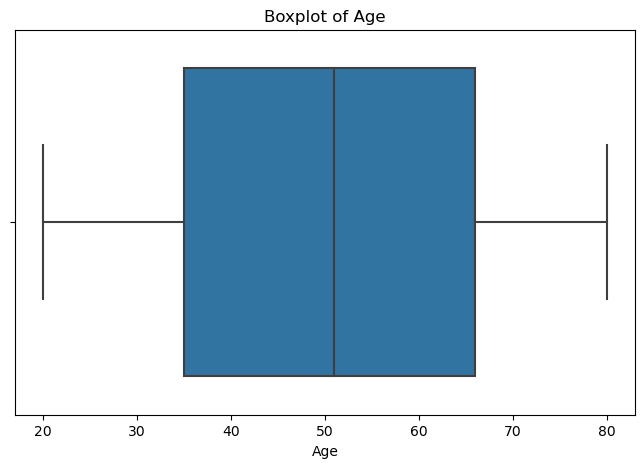

Feature 'Age' has 0 outliers.


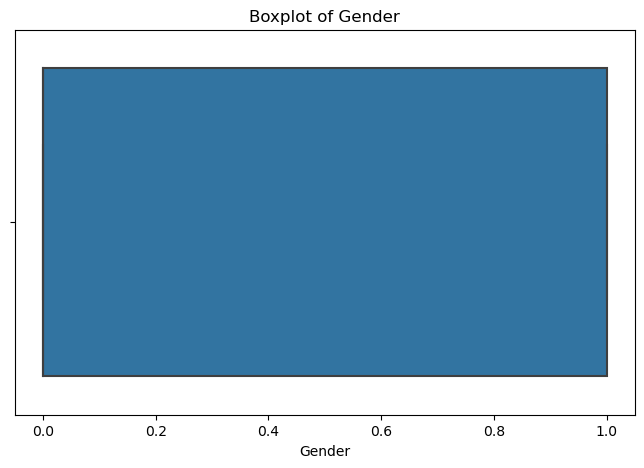

Feature 'Gender' has 0 outliers.


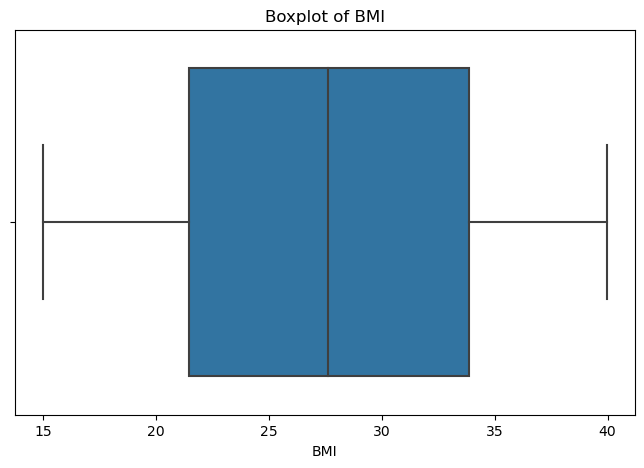

Feature 'BMI' has 0 outliers.


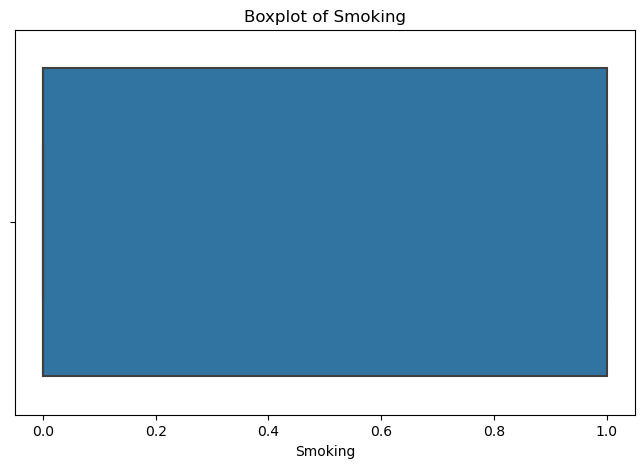

Feature 'Smoking' has 0 outliers.


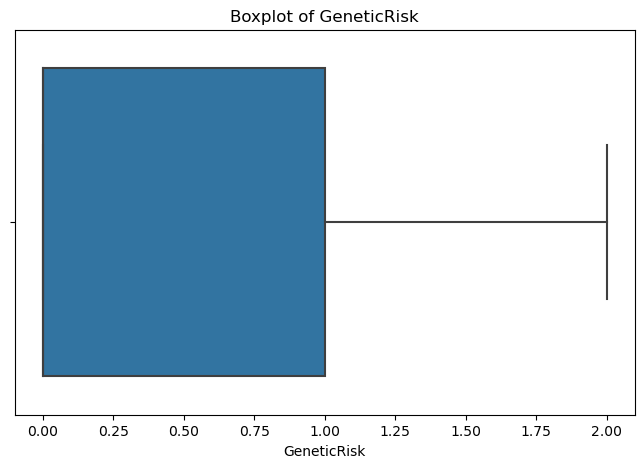

Feature 'GeneticRisk' has 0 outliers.


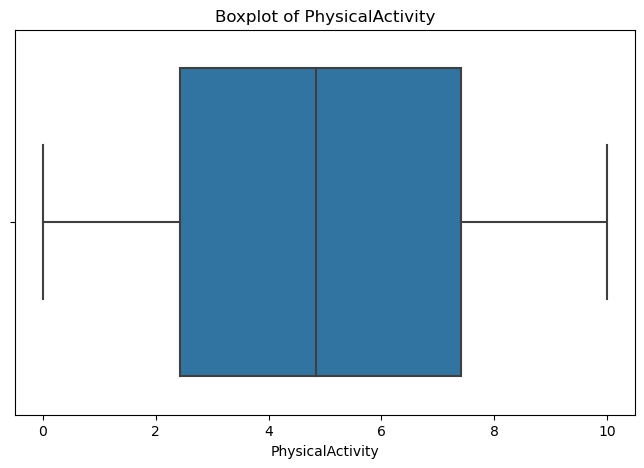

Feature 'PhysicalActivity' has 0 outliers.


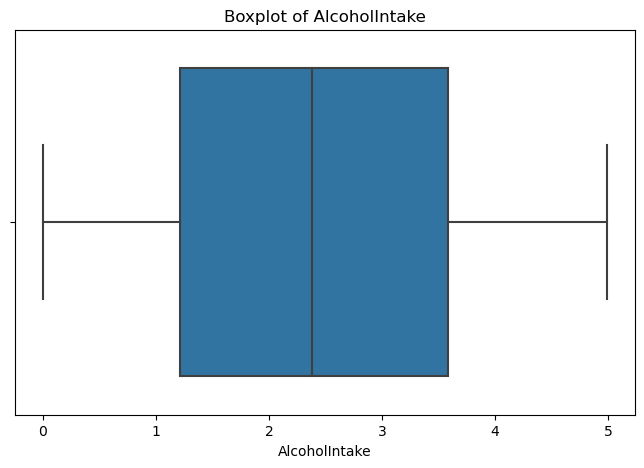

Feature 'AlcoholIntake' has 0 outliers.


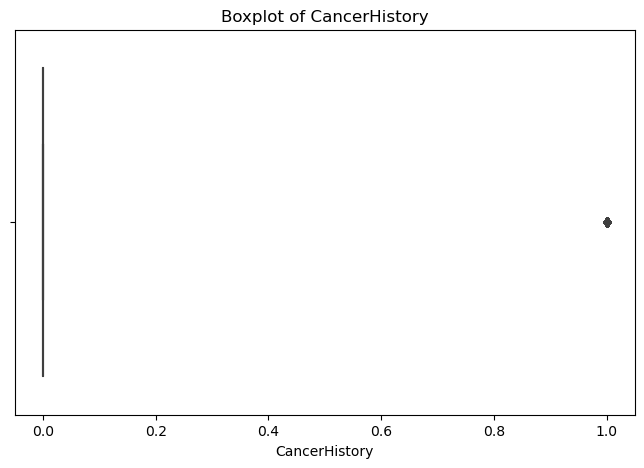

Feature 'CancerHistory' has 0 outliers.


In [15]:
for feature in X:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()
    print(f"Feature '{feature}' has {len(outliers)} outliers.")

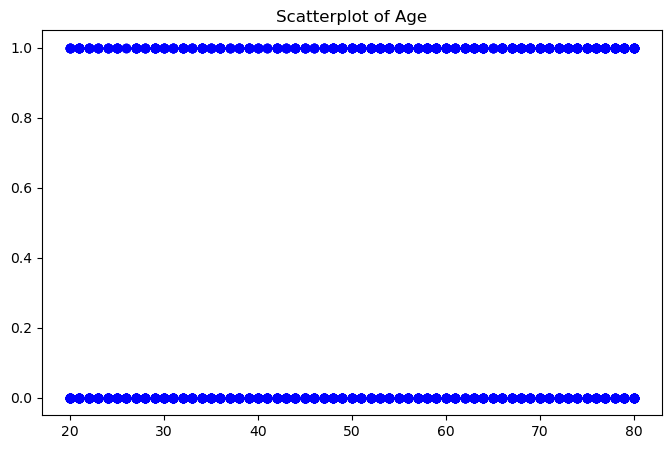

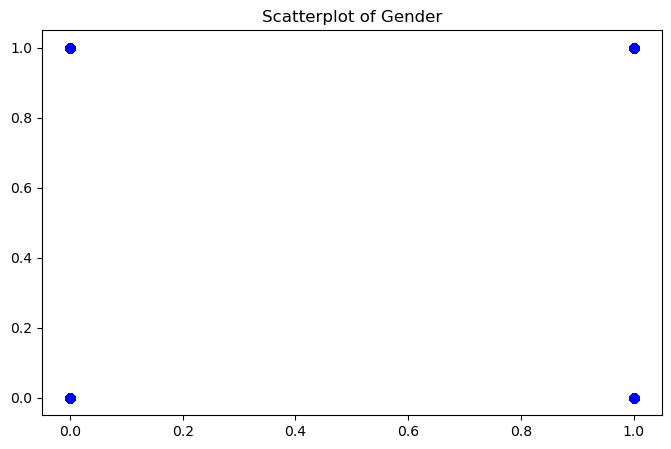

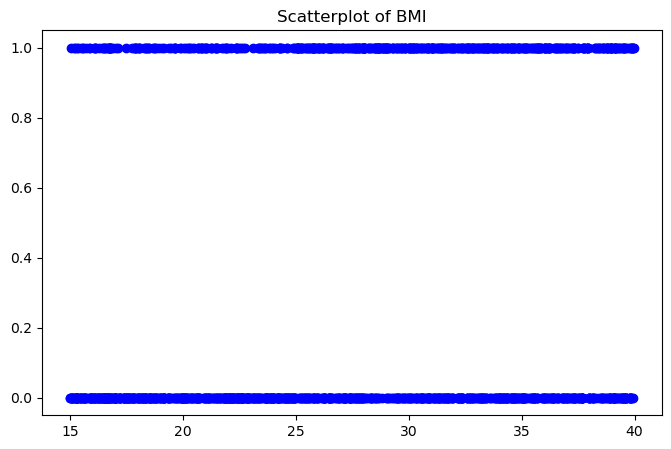

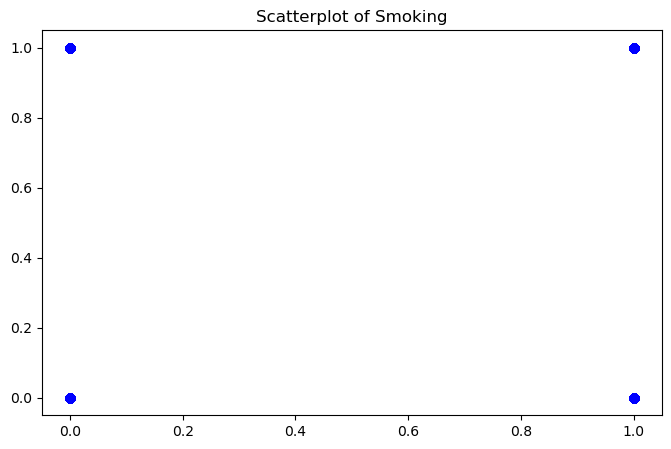

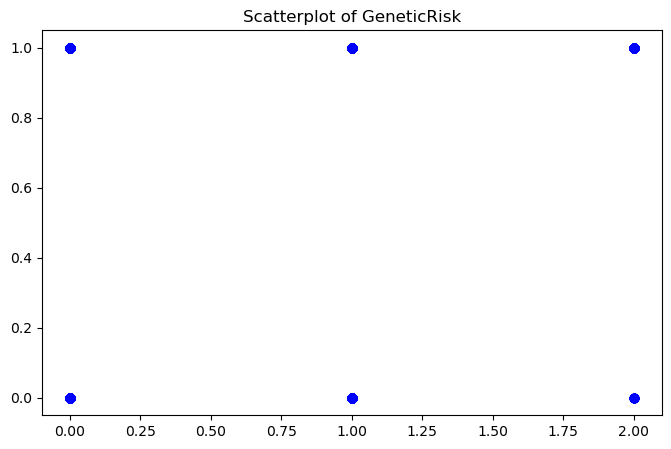

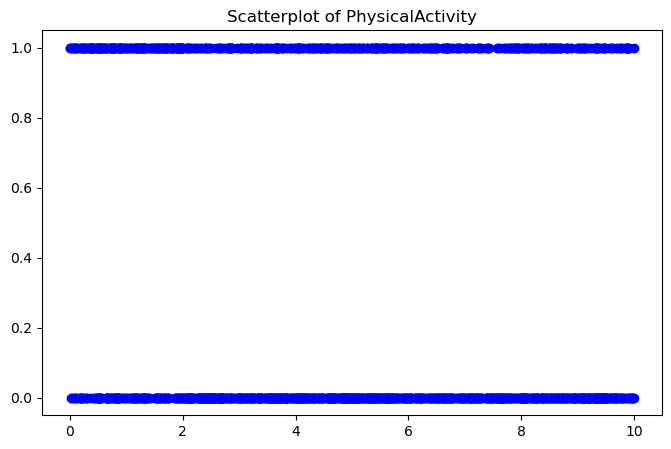

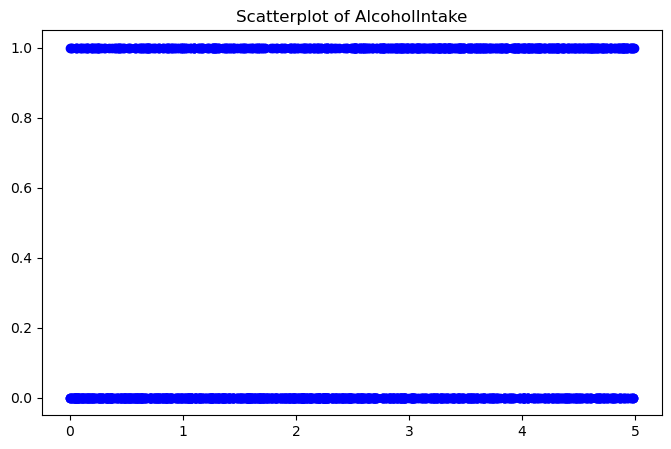

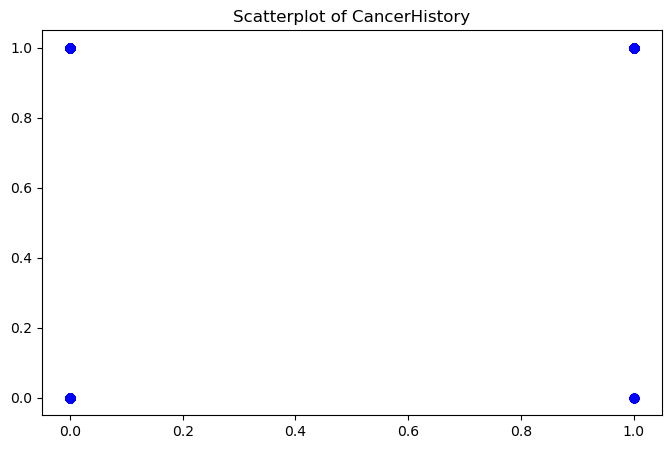

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in X:
    plt.figure(figsize=(8, 5))
    plt.scatter(x=X[feature],y=df.iloc[:, 8] , color='blue', label=f"'{feature}'")
    plt.title(f'Scatterplot of {feature}')
    plt.show()
